# DATA ANALYSIS
In this notebook we gonna explore the available data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('data/train.csv')
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
df[['target']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
target,7613.0,0.42966,0.49506,0.0,0.0,0.0,1.0,1.0


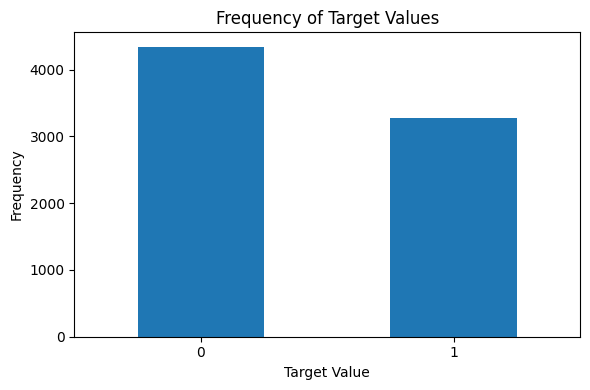

In [5]:
# Count the frequency of each target value
target_counts = df['target'].value_counts()

# Plot the bar chart
plt.figure(figsize=(6, 4))
target_counts.plot(kind='bar')
plt.title('Frequency of Target Values')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

In [6]:
df['keyword'].nunique()

221

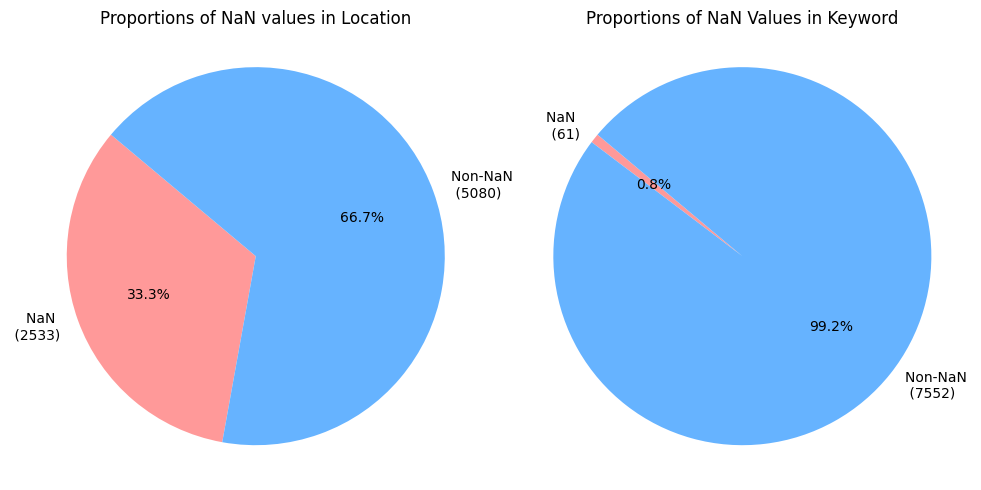

In [7]:
import matplotlib.pyplot as plt

# Count NaN values in 'location' and 'keyword' columns
nan_location_count = df['location'].isna().sum()
nan_keyword_count = df['keyword'].isna().sum()

# Count non-NaN values in 'location' and 'keyword' columns
non_nan_location_count = df['location'].notna().sum()
non_nan_keyword_count = df['keyword'].notna().sum()

# Create labels for the pie charts
labels_location = [f'NaN \n ({nan_location_count})', f'Non-NaN \n ({non_nan_location_count})']
labels_keyword = [f'NaN \n ({nan_keyword_count})', f'Non-NaN \n ({non_nan_keyword_count})']

# Create data for the pie charts
sizes_location = [nan_location_count, non_nan_location_count]
sizes_keyword = [nan_keyword_count, non_nan_keyword_count]

# Create colors for different sections of the pie charts
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Plot the pie chart for 'location' column
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(sizes_location, labels=labels_location, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proportions of NaN values in Location')


# Plot the pie chart for 'keyword' column
plt.subplot(1, 2, 2)
plt.pie(sizes_keyword, labels=labels_keyword, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proportions of NaN Values in Keyword')

# Adjust layout
plt.tight_layout()

# Show the pie charts
plt.show()


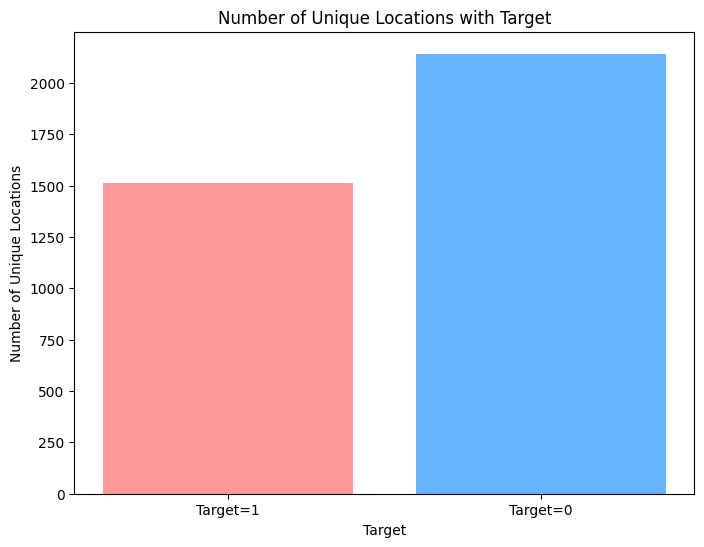

In [8]:
# Get unique locations with target equal to 1
unique_locations_target_one = df[df['target'] == 1]['location'].nunique()

# Get unique locations with target equal to 0
unique_locations_target_zero = df[df['target'] == 0]['location'].nunique()

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.bar(['Target=1', 'Target=0'], [unique_locations_target_one, unique_locations_target_zero], color=['#ff9999', '#66b3ff'])
plt.title('Number of Unique Locations with Target')
plt.xlabel('Target')
plt.ylabel('Number of Unique Locations')
plt.show()

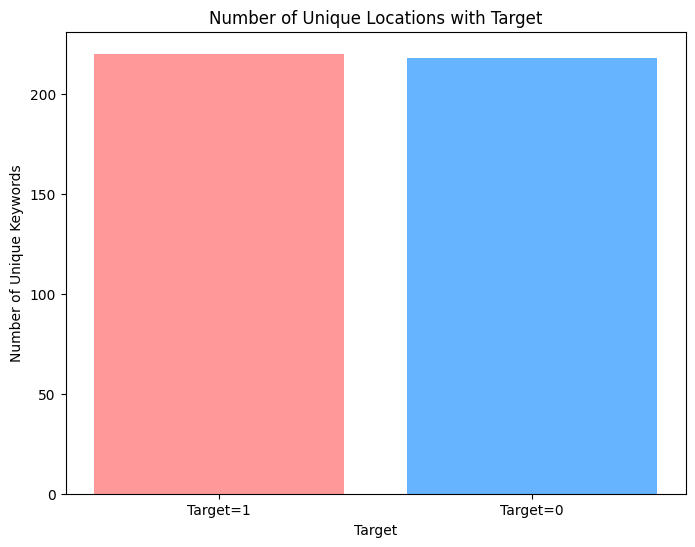

In [9]:
# Get unique locations with target equal to 1
unique_keywords_target_one = df[df['target'] == 1]['keyword'].nunique()

# Get unique locations with target equal to 0
unique_keywords_target_zero = df[df['target'] == 0]['keyword'].nunique()

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.bar(['Target=1', 'Target=0'], [unique_keywords_target_one, unique_keywords_target_zero], color=['#ff9999', '#66b3ff'])
plt.title('Number of Unique Locations with Target')
plt.xlabel('Target')
plt.ylabel('Number of Unique Keywords')
plt.show()

In [10]:
# Calculate the length of each text and create a new column 'text_length'
df['text_length'] = df['text'].apply(len)

# Calculate the average and maximum text length
average_text_length = df['text_length'].mean()
max_text_length = df['text_length'].max()

print("Average text length:", average_text_length)
print("Maximum text length:", max_text_length)

Average text length: 101.03743596479706
Maximum text length: 157


target
0     95.706817
1    108.113421
Name: text_length, dtype: float64


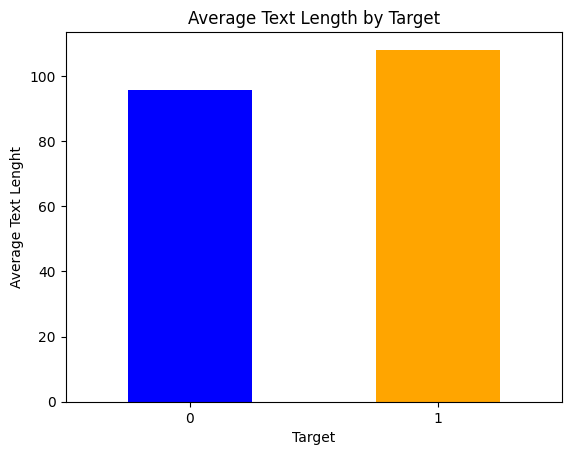

In [11]:
average_text_len_targer = df.groupby('target')['text_length'].mean()

print(average_text_len_targer)

# Plot the average word count in a histogram
average_text_len_targer.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Text Length by Target')
plt.xlabel('Target')
plt.ylabel('Average Text Lenght')
plt.xticks(rotation=0)
plt.show()

In [12]:
# Function to calculate word count
def word_count(text):
    return len(text.split())

# Apply the function to each row of the 'text' column
df['word_count'] = df['text'].apply(lambda x: word_count(x))

# Display the DataFrame
df

,id,keyword,location,text,target,text_length,word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19


target
0    14.704744
1    15.167533
Name: word_count, dtype: float64


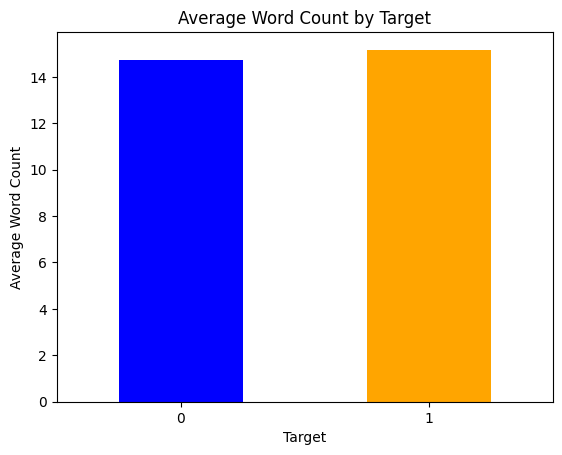

In [13]:
# Calculate the average word count by target
average_word_count = df.groupby('target')['word_count'].mean()
print(average_word_count)

# Plot the average word count in a histogram
average_word_count.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Word Count by Target')
plt.xlabel('Target')
plt.ylabel('Average Word Count')
plt.xticks(rotation=0)
plt.show()

In [14]:
import nltk
from nltk.corpus import stopwords

# Download NLTK stop words data
nltk.download('stopwords')

# Load stop words
stop_words = set(stopwords.words('english'))

# Function to calculate stop word ratio
def stop_word_ratio(text):
    words = text.split()
    num_stop_words = sum(1 for word in words if word.lower() in stop_words)
    return num_stop_words / len(words) if len(words) > 0 else 0

# Apply the function to each row of the 'text' column
df['stop_word_ratio'] = df['text'].apply(stop_word_ratio)

df

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/robertodellarocca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,keyword,location,text,target,text_length,word_count,stop_word_ratio
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158


target
0    0.302456
1    0.252516
Name: stop_word_ratio, dtype: float64


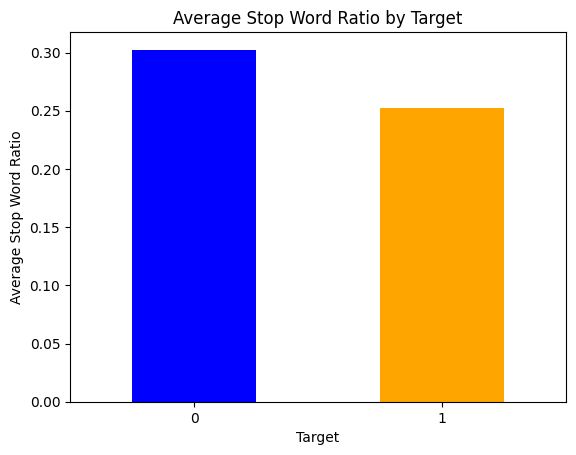

In [16]:
# Calculate the average stop word ratio by target
average_stop_word_ratio = df.groupby('target')['stop_word_ratio'].mean()
print(average_stop_word_ratio)

average_stop_word_ratio.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Stop Word Ratio by Target')
plt.xlabel('Target')
plt.ylabel('Average Stop Word Ratio')
plt.xticks(rotation=0)
plt.show()

In [21]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/robertodellarocca/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/robertodellarocca/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/robertodellarocca/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/robertodellarocca/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/robertodellarocca/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/robertodellarocca/nltk_data...
[nltk_data]    |   Unzipp

True

In [23]:
from nltk.tokenize import word_tokenize

# Function to calculate unique word count
def unique_word_count(text):
    words = word_tokenize(text.lower())  # Tokenize text and convert to lowercase
    unique_words = set(words)
    return len(unique_words)

# Apply the function to each row of the 'text' column
df['unique_word_count'] = df['text'].apply(unique_word_count)

df

,id,keyword,location,text,target,text_length,word_count,stop_word_ratio,unique_word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538,14
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000,8
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000,21
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000,9
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500,16
...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818,13
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000,18
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000,15
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158,19


target
0    16.542377
1    17.335983
Name: unique_word_count, dtype: float64


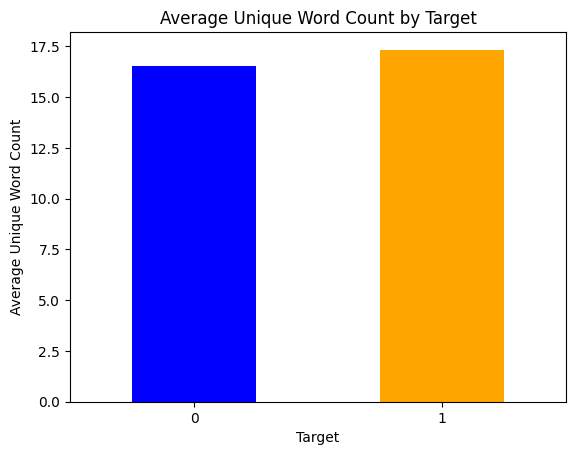

In [24]:
# Calculate the average unique word count by target
average_unique_word_count = df.groupby('target')['unique_word_count'].mean()

# Display the average unique word count
print(average_unique_word_count)

average_unique_word_count.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Unique Word Count by Target')
plt.xlabel('Target')
plt.ylabel('Average Unique Word Count')
plt.xticks(rotation=0)
plt.show()

In [25]:
# Function to calculate Type-Token Ratio (TTR)
def ttr(text):
    words = word_tokenize(text.lower())  # Tokenize text and convert to lowercase
    total_words = len(words)
    unique_words = set(words)
    total_unique_words = len(unique_words)
    if total_words > 0:
        return total_unique_words / total_words
    else:
        return 0

# Apply the function to each row of the 'text' column
df['ttr'] = df['text'].apply(ttr)

df

,id,keyword,location,text,target,text_length,word_count,stop_word_ratio,unique_word_count,ttr
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538,14,1.000000
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000,8,1.000000
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000,21,0.875000
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000,9,1.000000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500,16,0.888889
...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818,13,1.000000
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000,18,0.750000
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000,15,1.000000
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158,19,0.904762


target
0    0.902543
1    0.911844
Name: ttr, dtype: float64


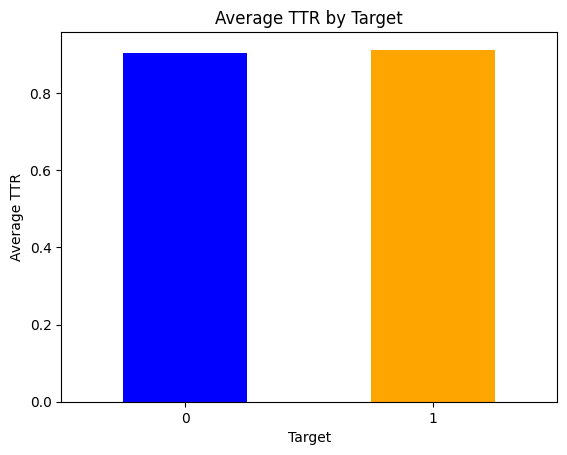

In [26]:
average_ttr = df.groupby('target')['ttr'].mean()

# Display the average ttr 
print(average_ttr)

average_ttr.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average TTR by Target')
plt.xlabel('Target')
plt.ylabel('Average TTR')
plt.xticks(rotation=0)
plt.show()

In [28]:
from collections import Counter
import numpy as np

# Function to calculate Shannon entropy
def entropy(text):
    # Count the occurrences of each character in the text
    counts = Counter(text.lower())
    # Total number of characters
    total_chars = sum(counts.values())
    # Calculate the probability of each character
    probs = [count / total_chars for count in counts.values()]
    # Calculate Shannon entropy
    entropy = -np.sum([prob * np.log2(prob) for prob in probs])
    return entropy

# Apply the function to each row of the 'text' column
df['entropy'] = df['text'].apply(entropy)

# Display the DataFrame
df

,id,keyword,location,text,target,text_length,word_count,stop_word_ratio,unique_word_count,ttr,entropy
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538,14,1.000000,3.932597
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000,8,1.000000,3.655051
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000,21,0.875000,4.016236
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000,9,1.000000,4.110357
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500,16,0.888889,4.084352
...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818,13,1.000000,4.358793
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000,18,0.750000,4.047573
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000,15,1.000000,4.824055
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158,19,0.904762,4.118722


target
0    4.215828
1    4.342451
Name: entropy, dtype: float64


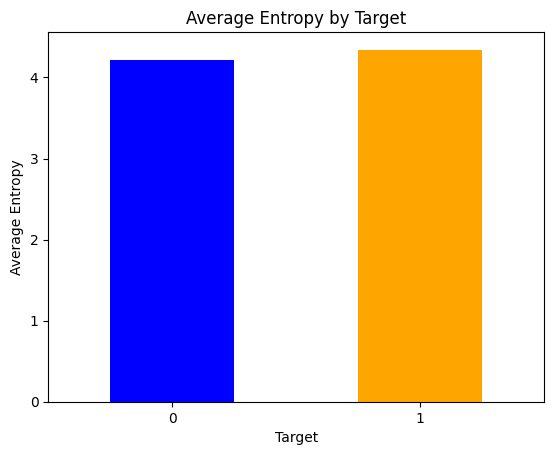

In [29]:
average_entropy = df.groupby('target')['entropy'].mean()

print(average_entropy)

average_entropy.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Entropy by Target')
plt.xlabel('Target')
plt.ylabel('Average Entropy')
plt.xticks(rotation=0)
plt.show()